# rock density_xray

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\tala\\mashin learning\\rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [4]:
df.columns=["signal","density"]

In [5]:
df.head()

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='signal', ylabel='density'>

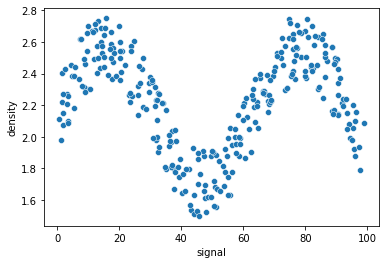

In [6]:
sns.scatterplot(x="signal" , y="density" , data=df)

In [7]:
inputs=df["signal"].values.reshape(-1,1)
target=df["density"]

In [8]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test=train_test_split(inputs, target , test_size=0.1 , random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train , y_train)
reg_pred=reg.predict(x_test)

In [10]:
from sklearn.metrics import mean_absolute_error 

MAE=mean_absolute_error(y_test , reg_pred)

In [11]:
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(y_test , reg_pred)
RMSE=np.sqrt(mean_squared_error(y_test, reg_pred))

In [12]:
MAE

0.24102551432457792

In [13]:
MSE

0.08782350344651227

In [14]:
RMSE

0.29635030529174805

In [15]:
y_test.mean()

2.204883733138319

In [16]:
signal_range=np.arange(0,100)
signal_pred=reg.predict(signal_range.reshape(-1,1))

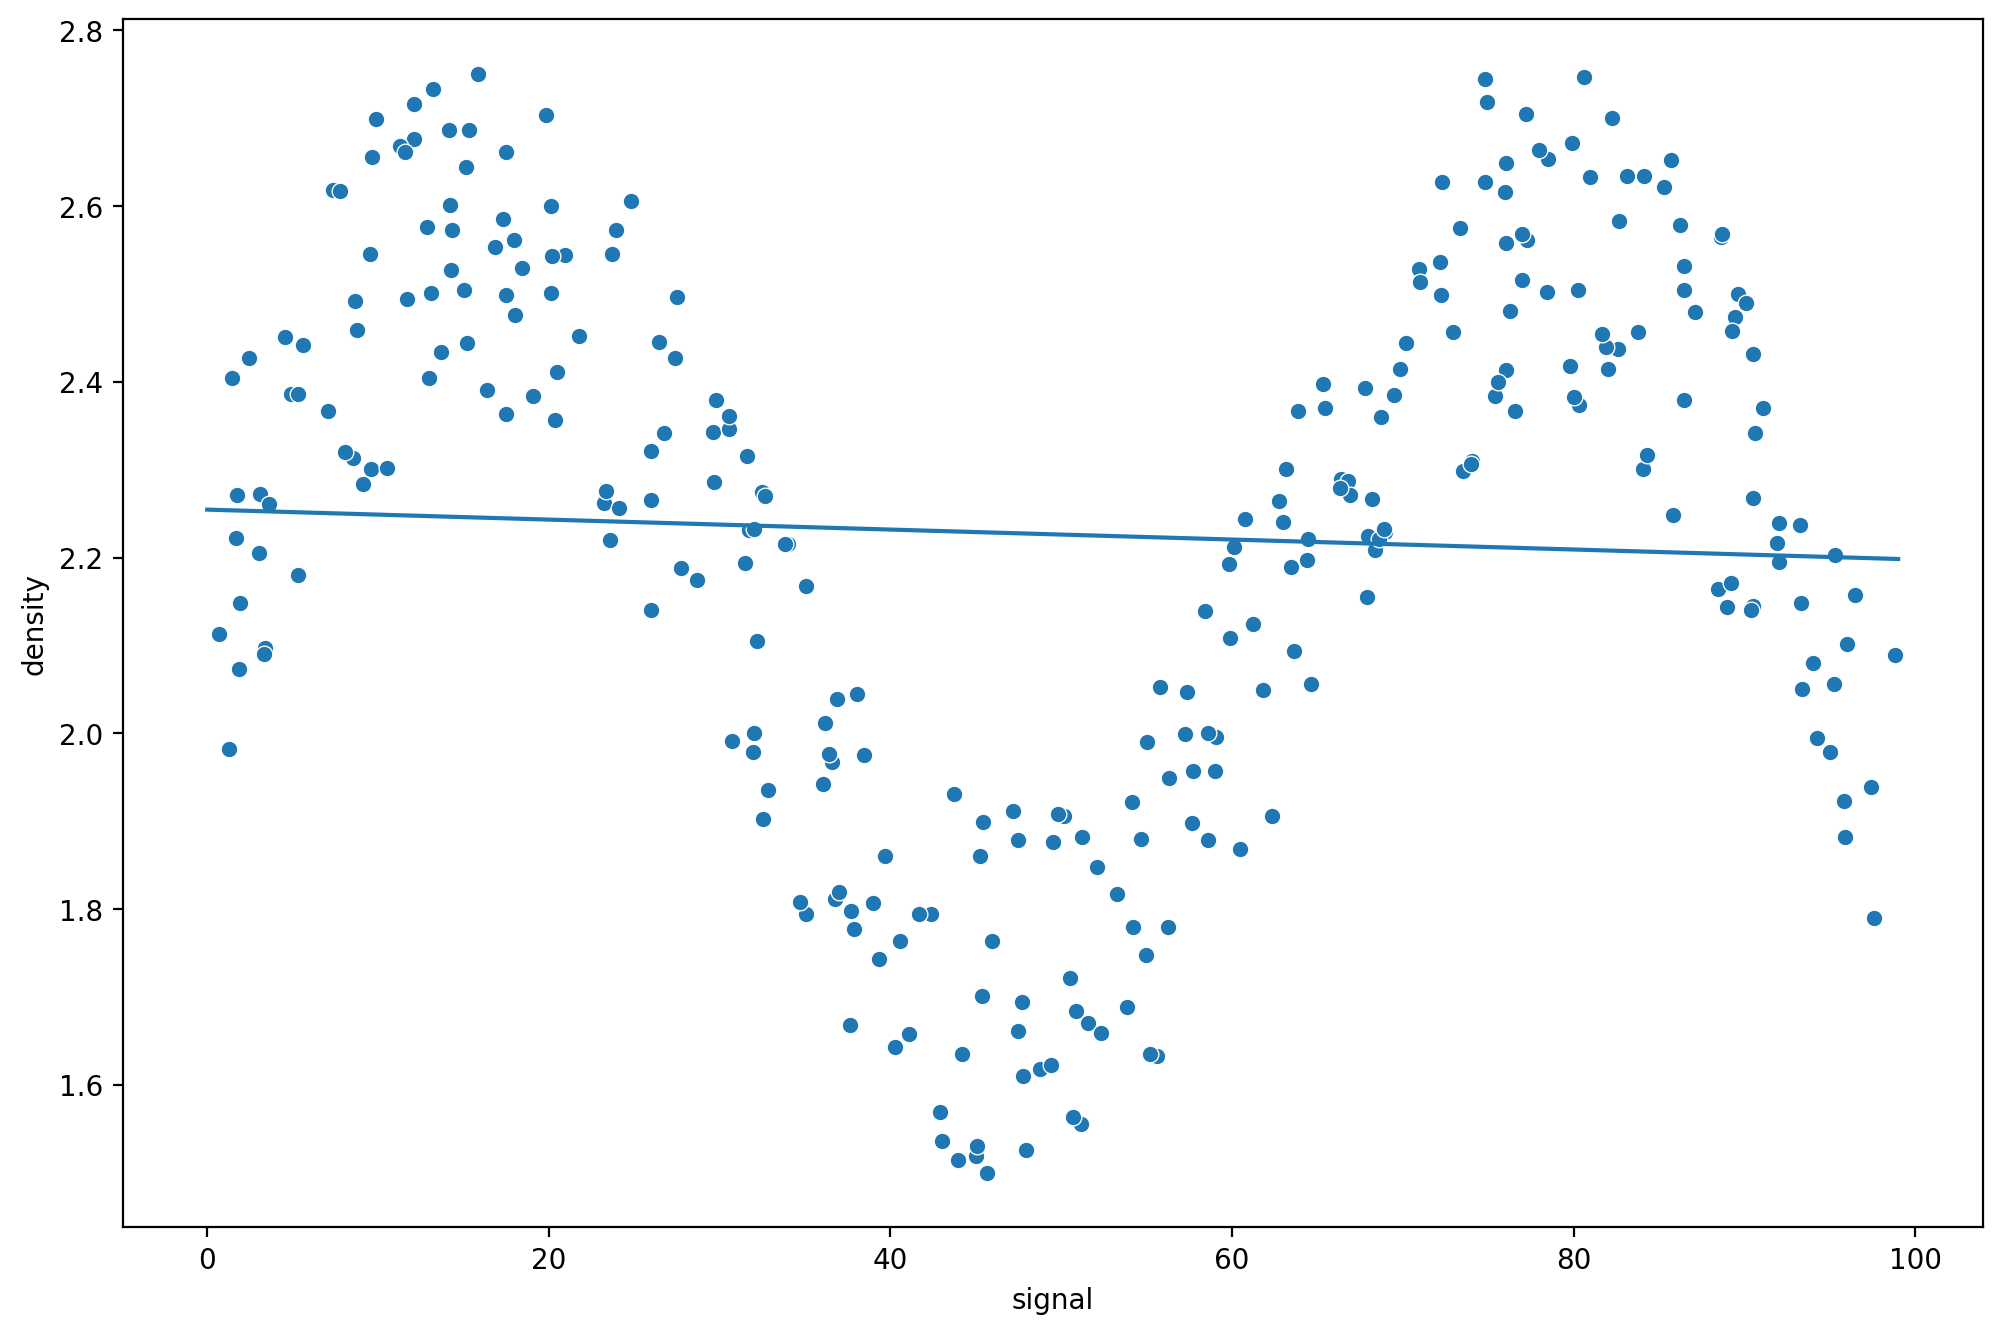

In [17]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="signal", y="density",data=df)
plt.plot(signal_range , signal_pred)

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe=make_pipeline(PolynomialFeatures(degree=4),LinearRegression())

In [19]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [20]:
pipe_pred=pipe.predict(x_test)

In [21]:
from sklearn.metrics import mean_absolute_error 

MAE=mean_absolute_error(y_test , pipe_pred)

In [22]:
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(y_test , pipe_pred)
RMSE=np.sqrt(mean_squared_error(y_test, pipe_pred))

In [23]:
MAE

0.12165576464548247

In [24]:
MSE

0.02155418042557507

In [25]:
RMSE

0.14681342045458606

In [26]:
signal_pred=pipe.predict(signal_range.reshape(-1,1))

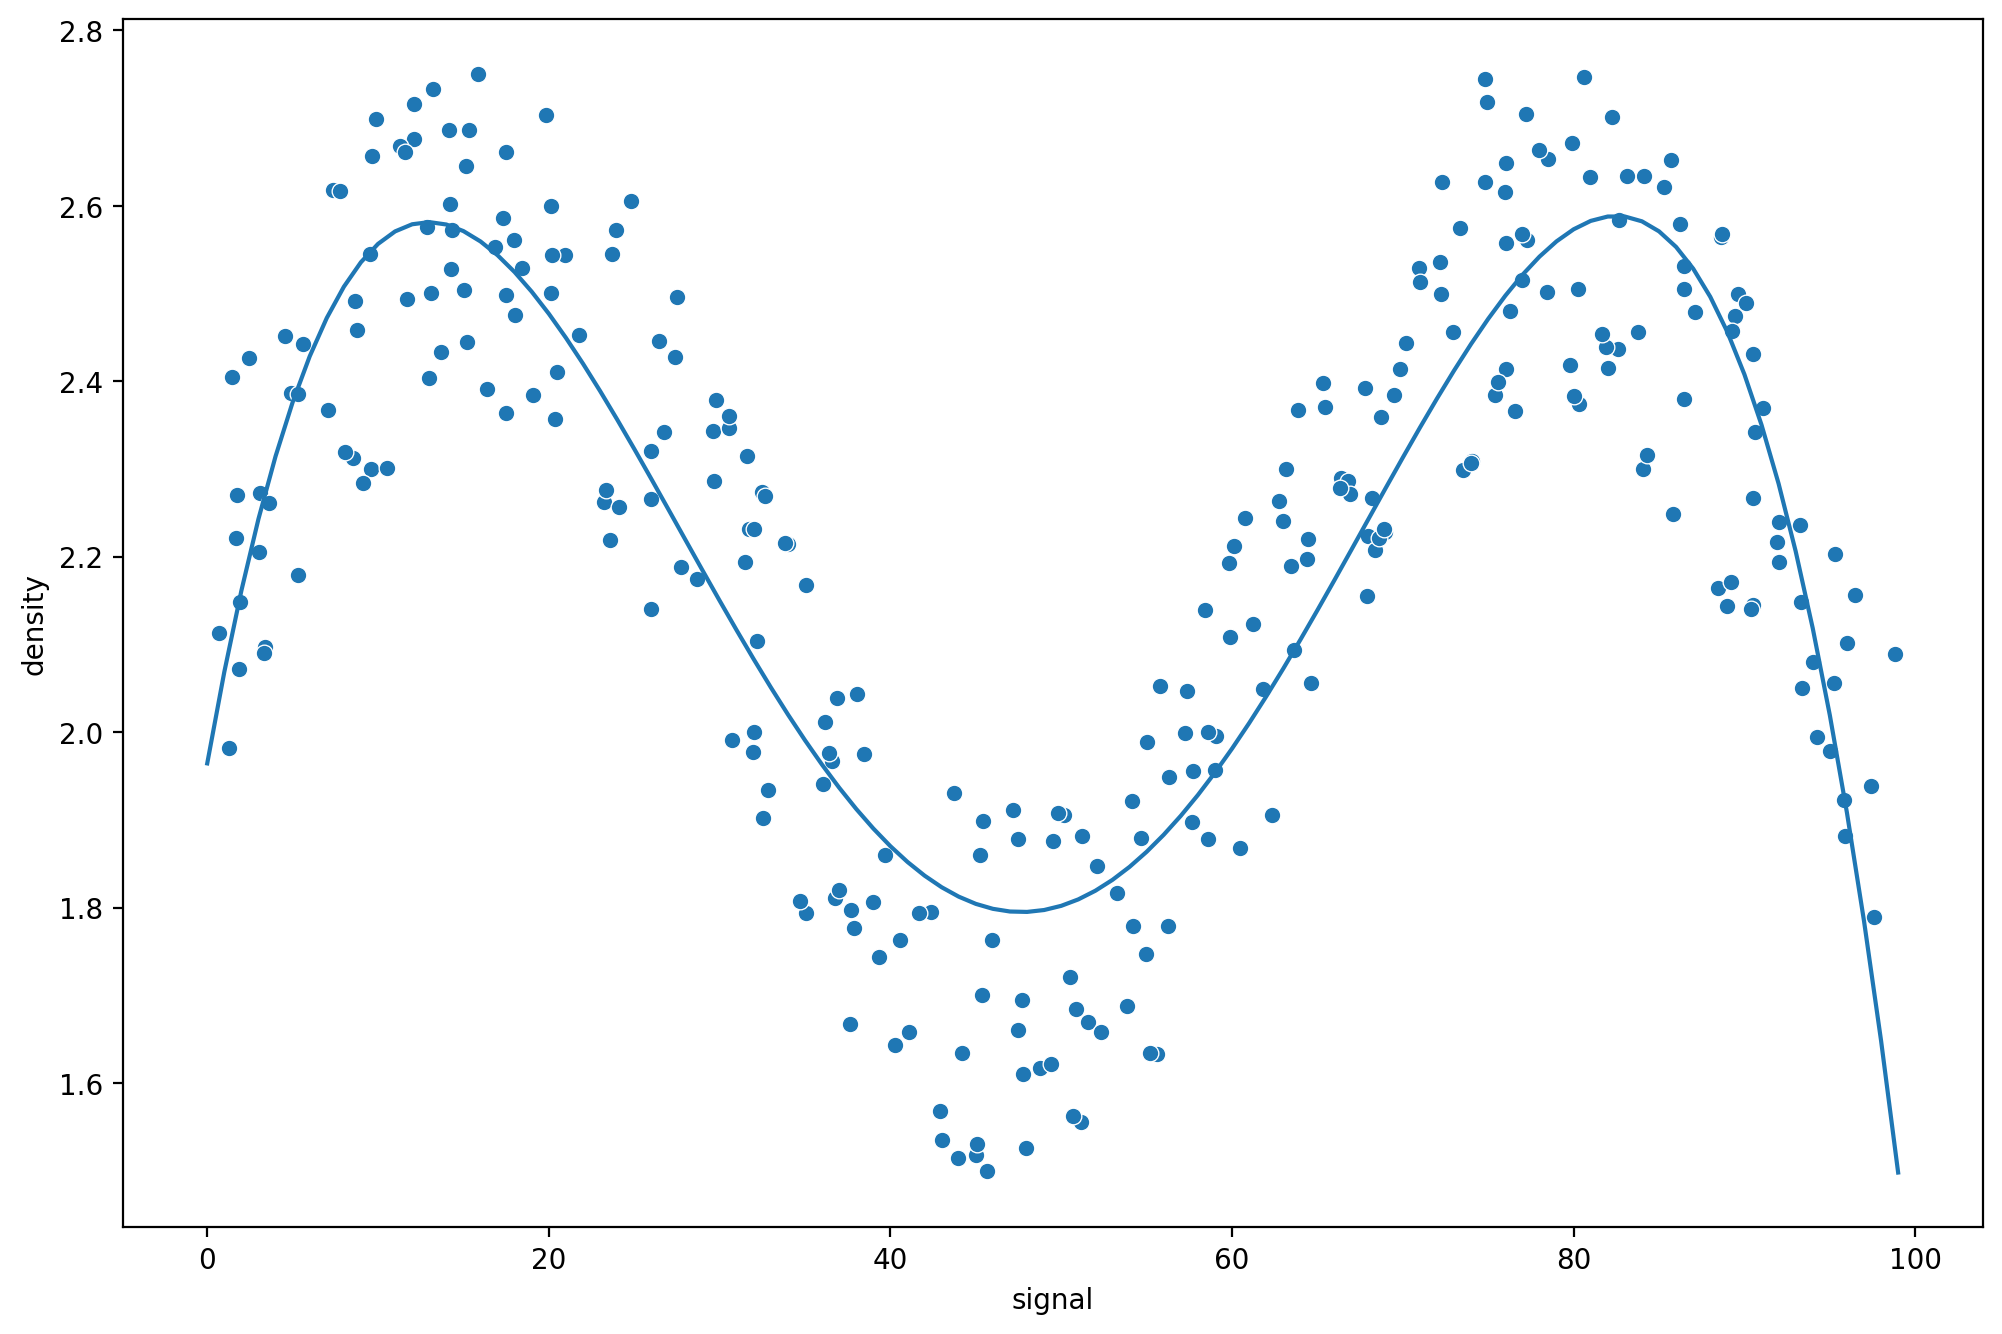

In [27]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="signal", y="density",data=df)
plt.plot(signal_range , signal_pred)

# KNeighborsClassifier

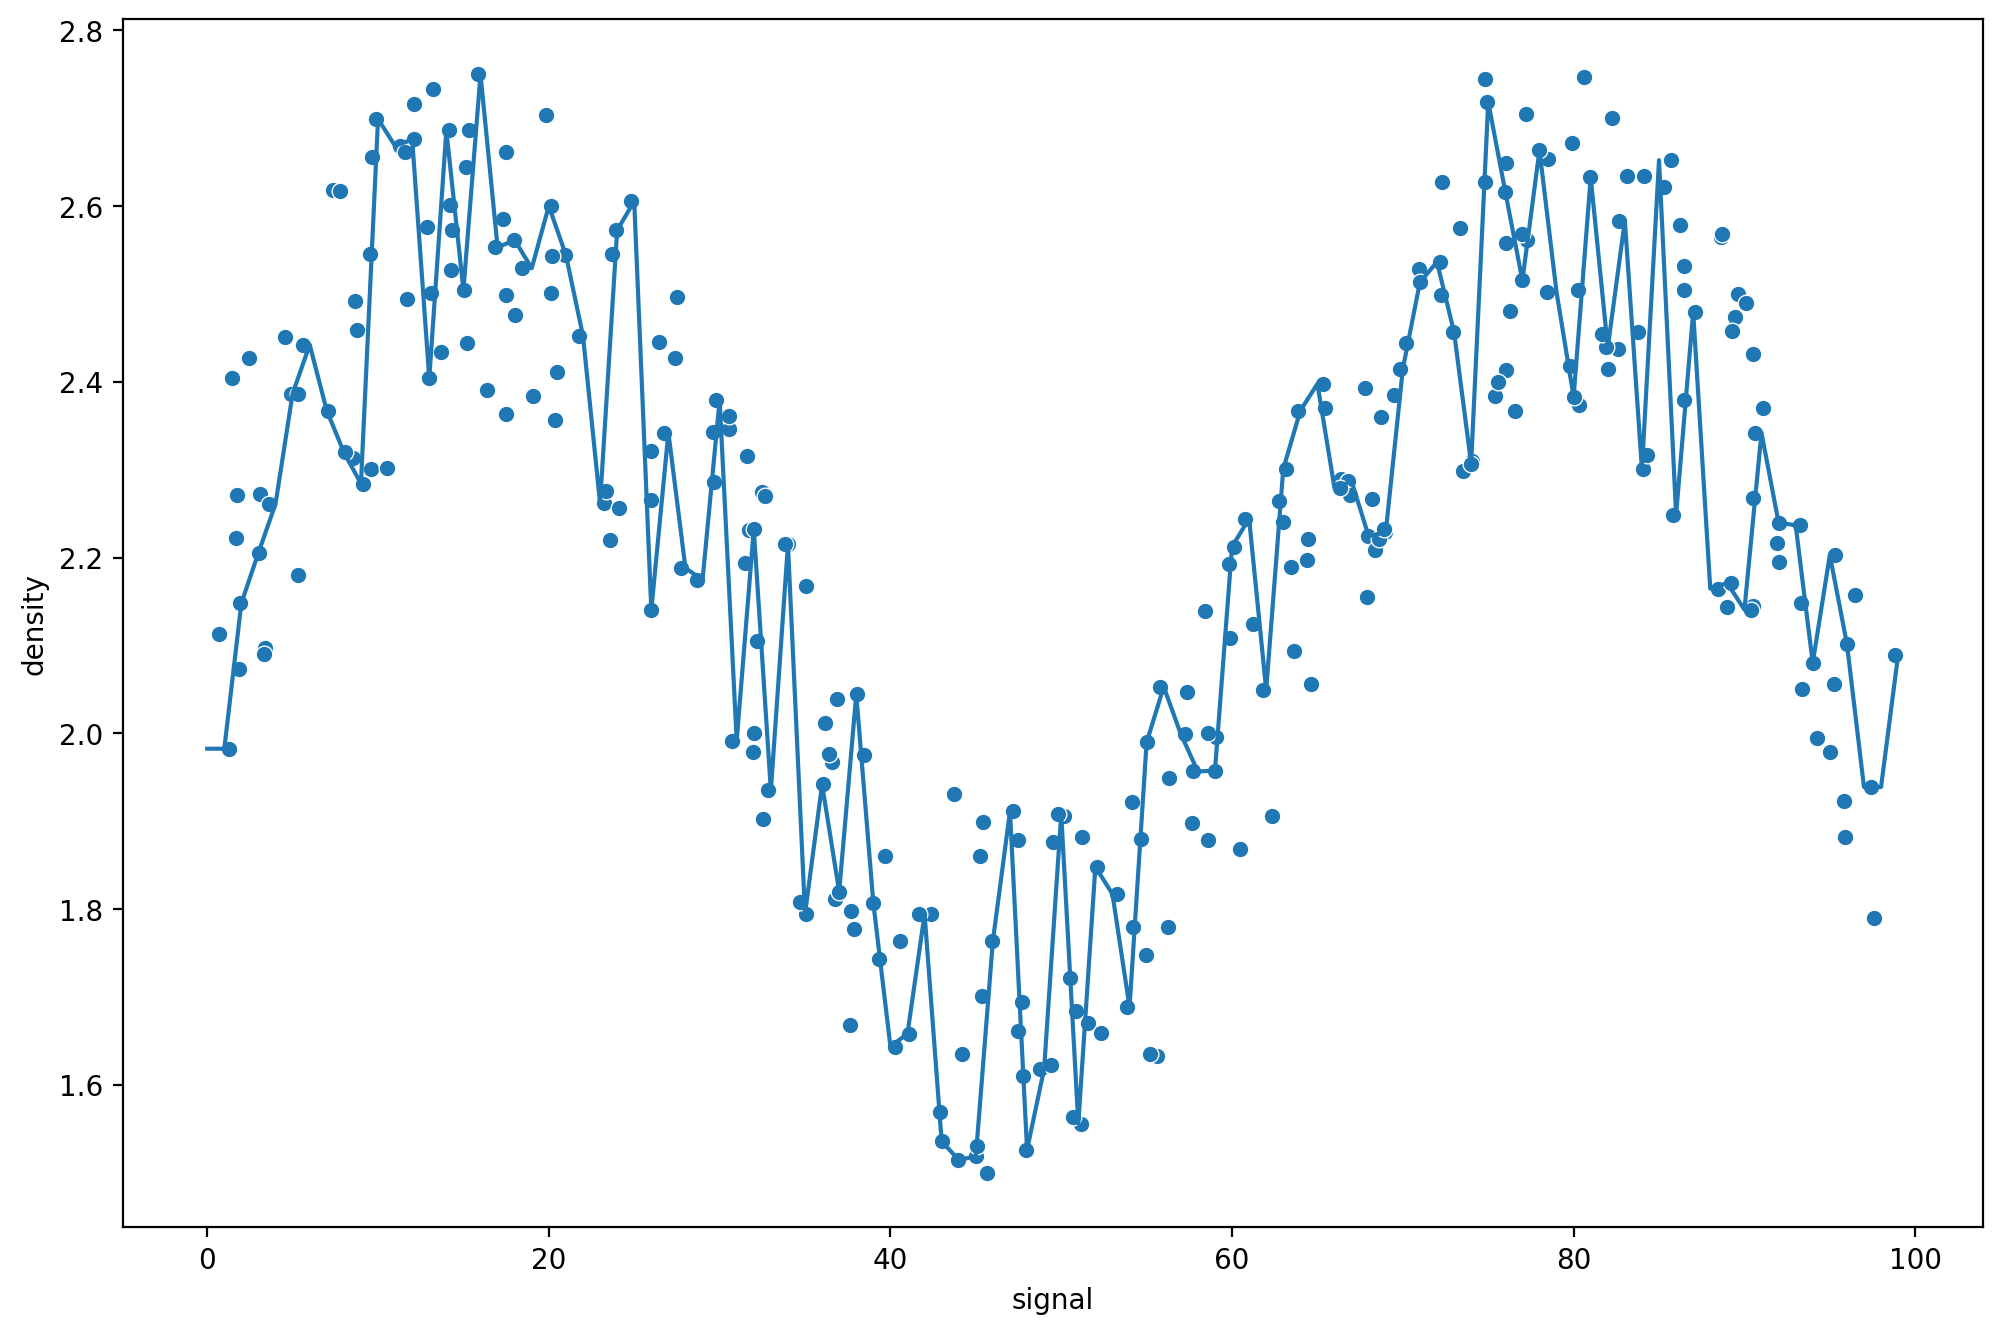

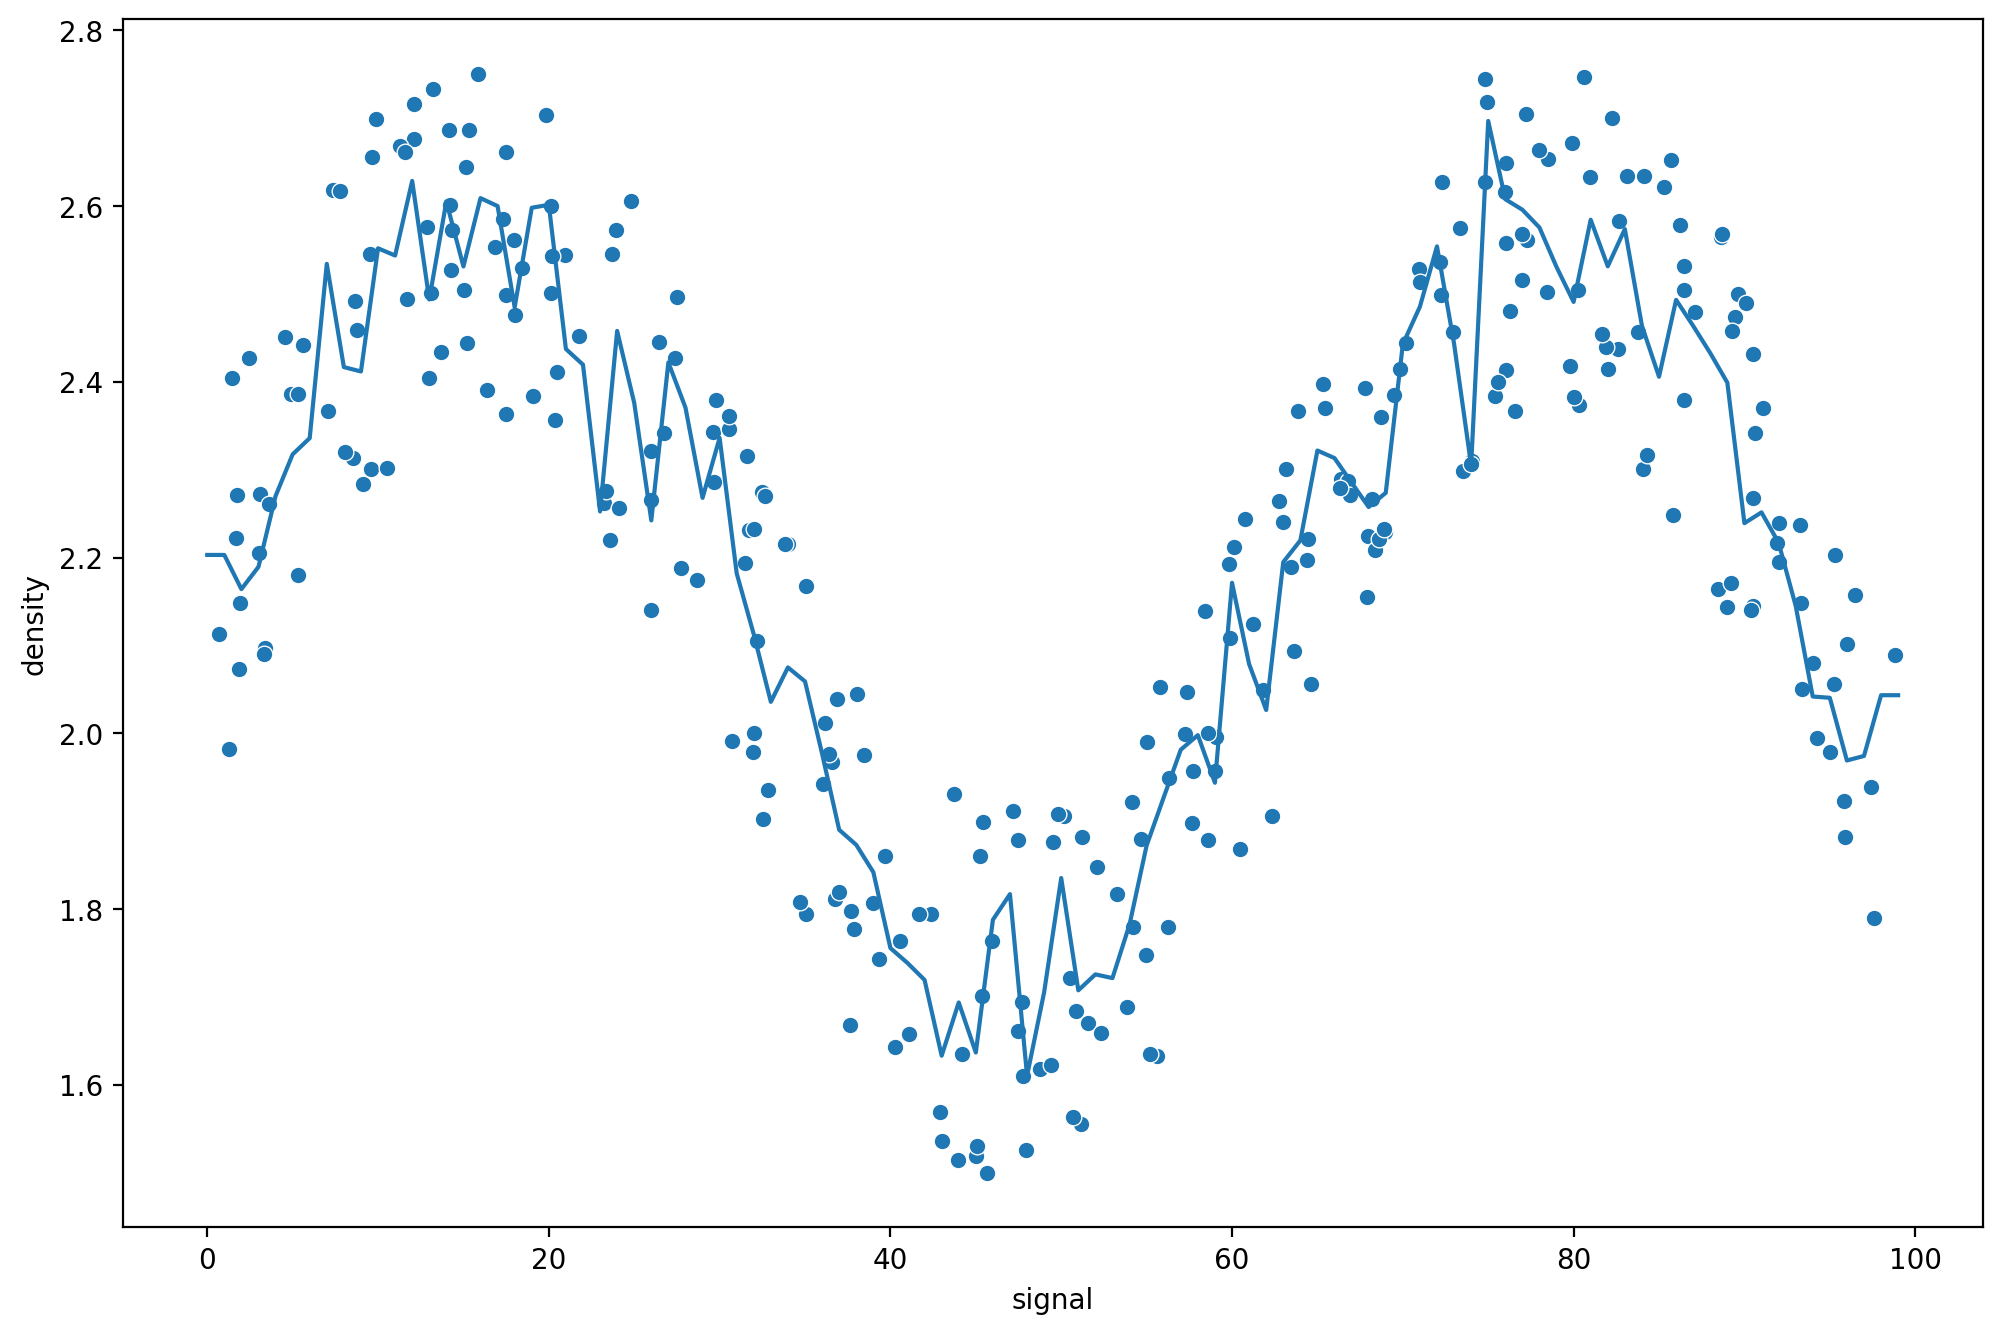

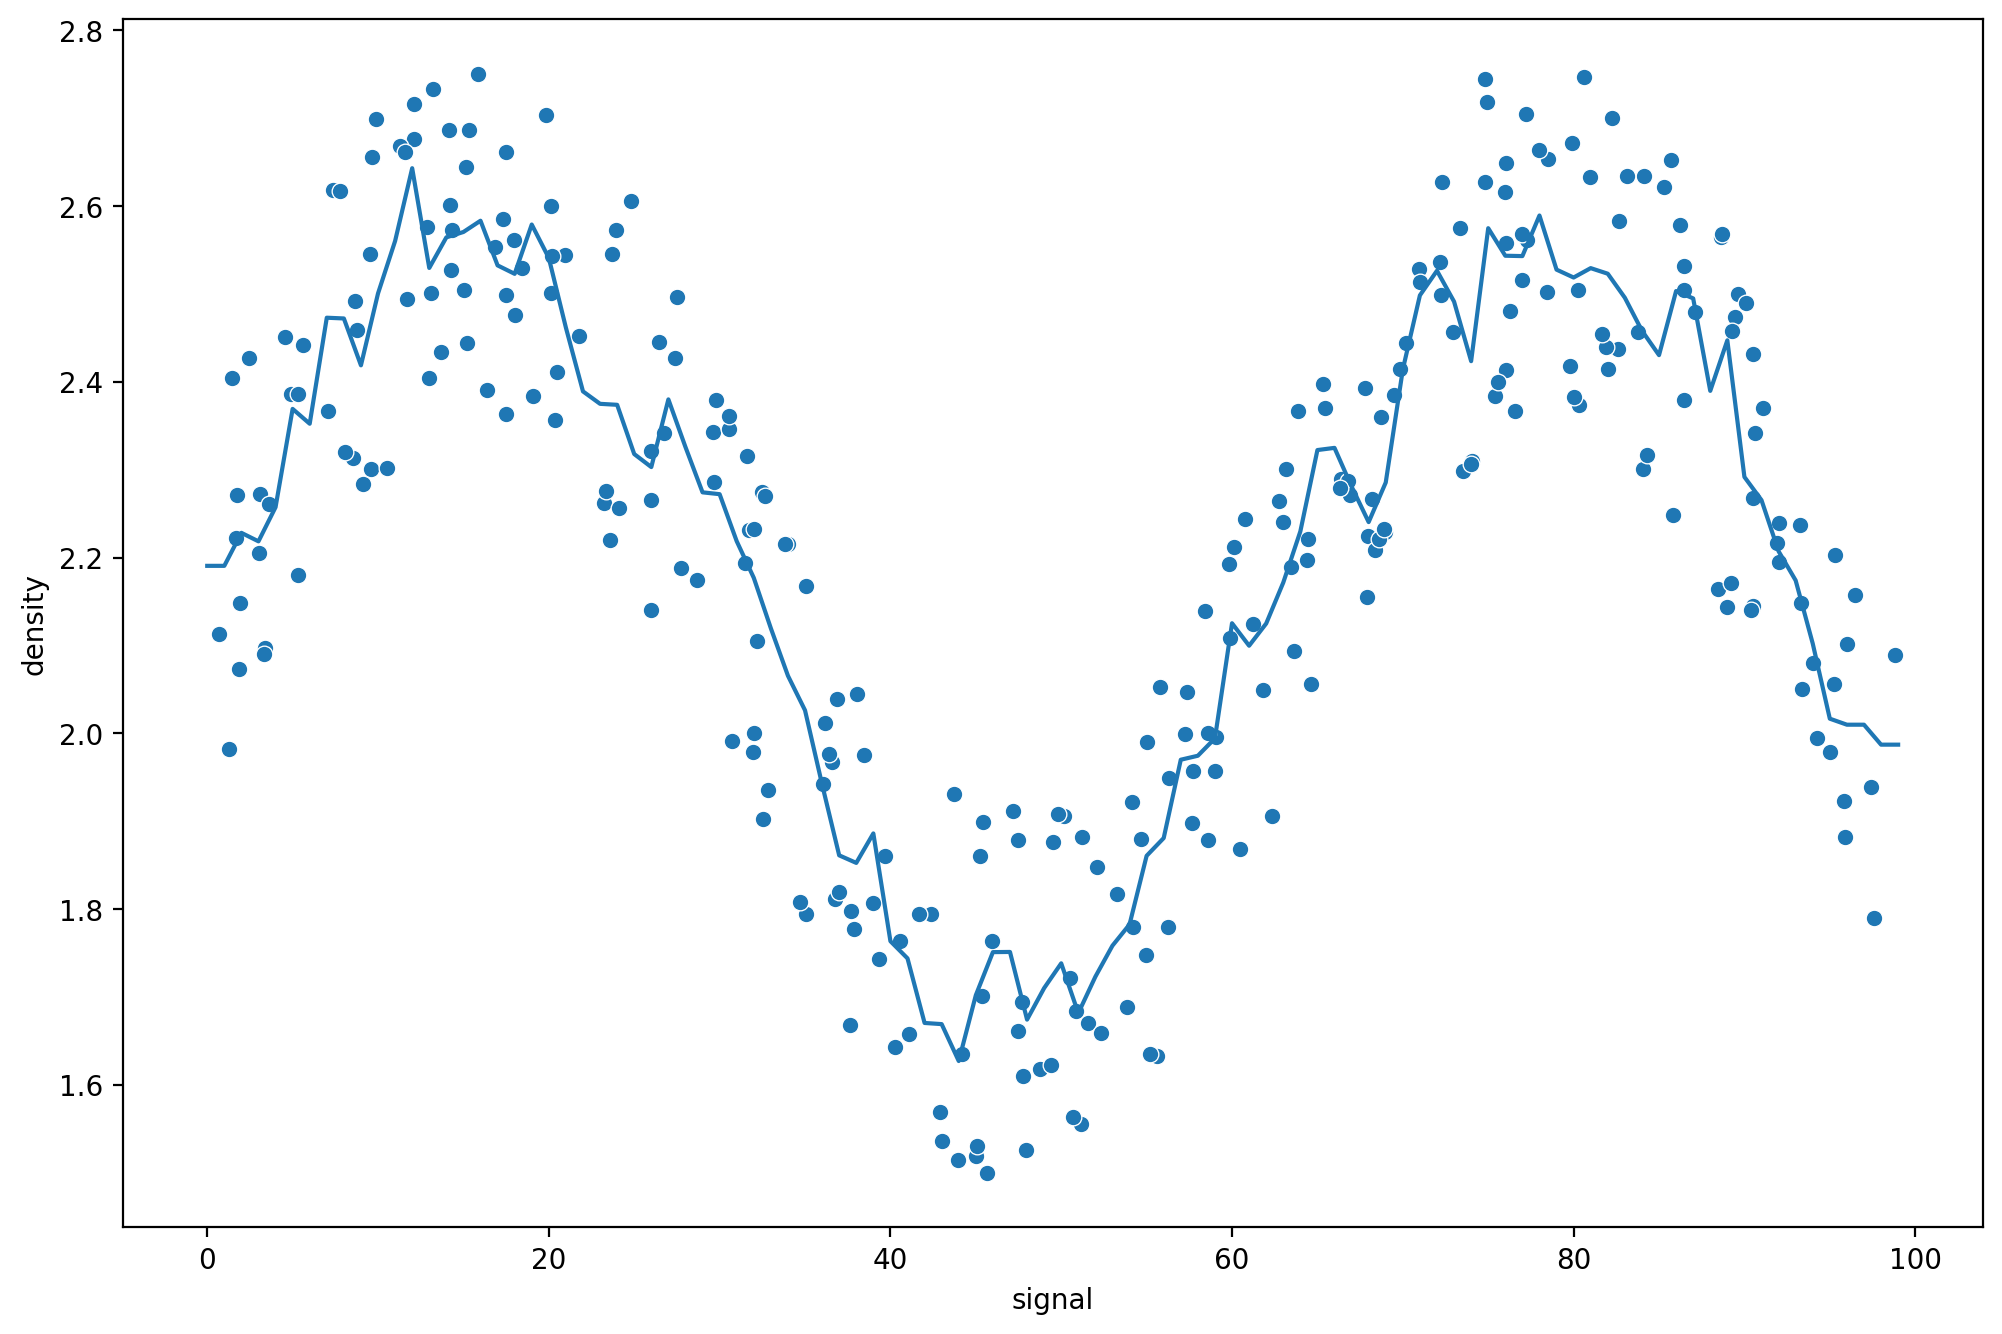

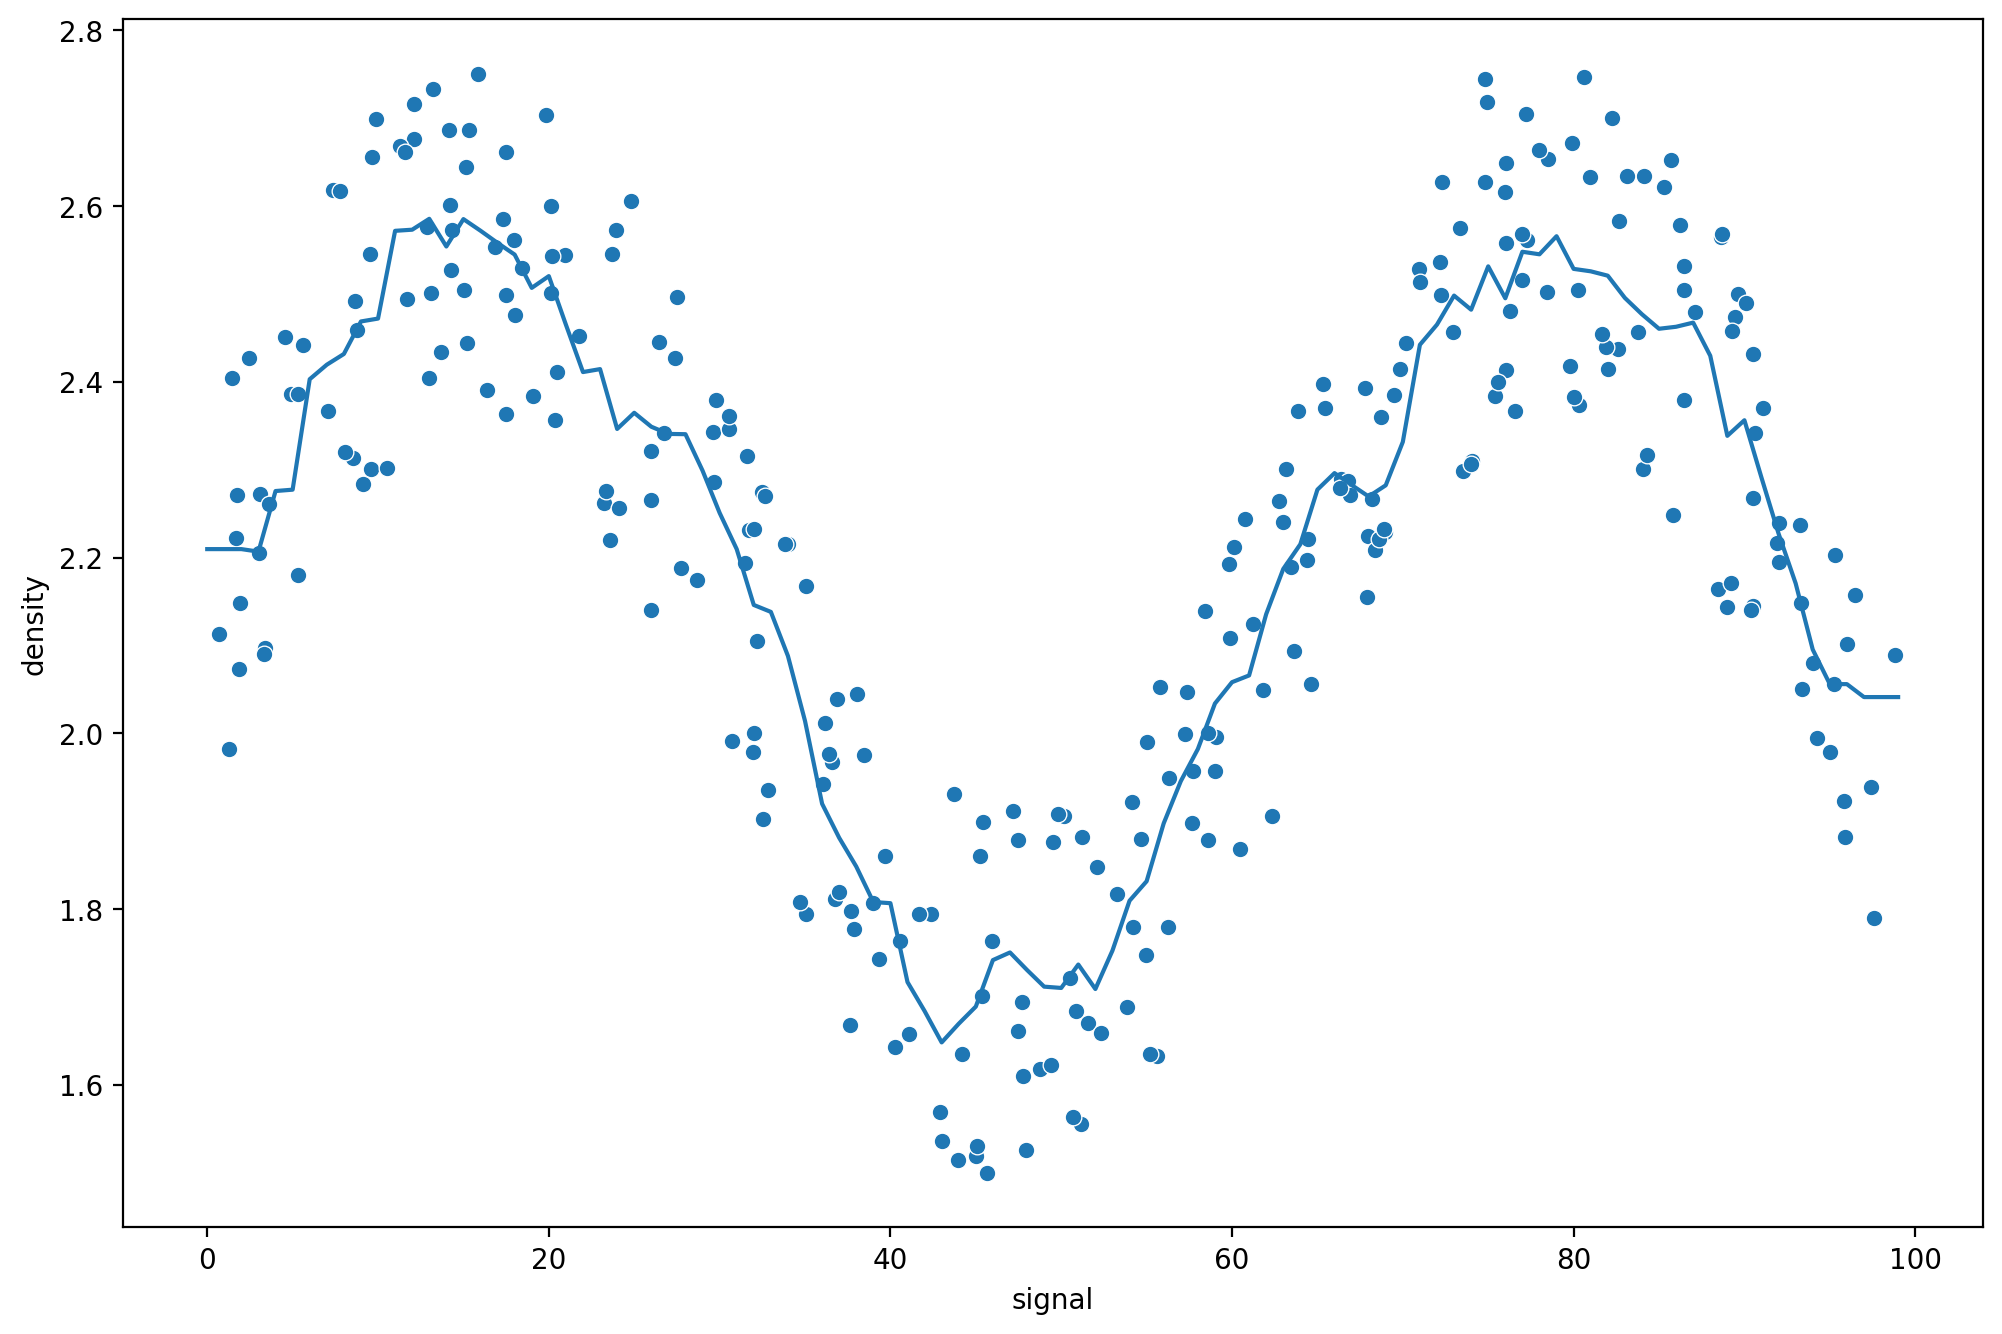

In [28]:
from sklearn.neighbors import KNeighborsRegressor

for i in [1,3,5,10]:
    knn_model=KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(x_train , y_train)
    knn_pred=knn_model.predict(x_test)
    
    signal_knn_pred=knn_model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x="signal", y="density",data=df)
    plt.plot(signal_range , signal_knn_pred)

In [29]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
grid_param={"n_neighbors":[1,3,5,6,8,10]}
knn_grid=GridSearchCV(knn, grid_param)
knn_grid.fit(x_train , y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 6, 8, 10]})

In [30]:
knn_grid.best_params_

{'n_neighbors': 8}

In [31]:
knn_grid_pred=knn_grid.predict(x_test)

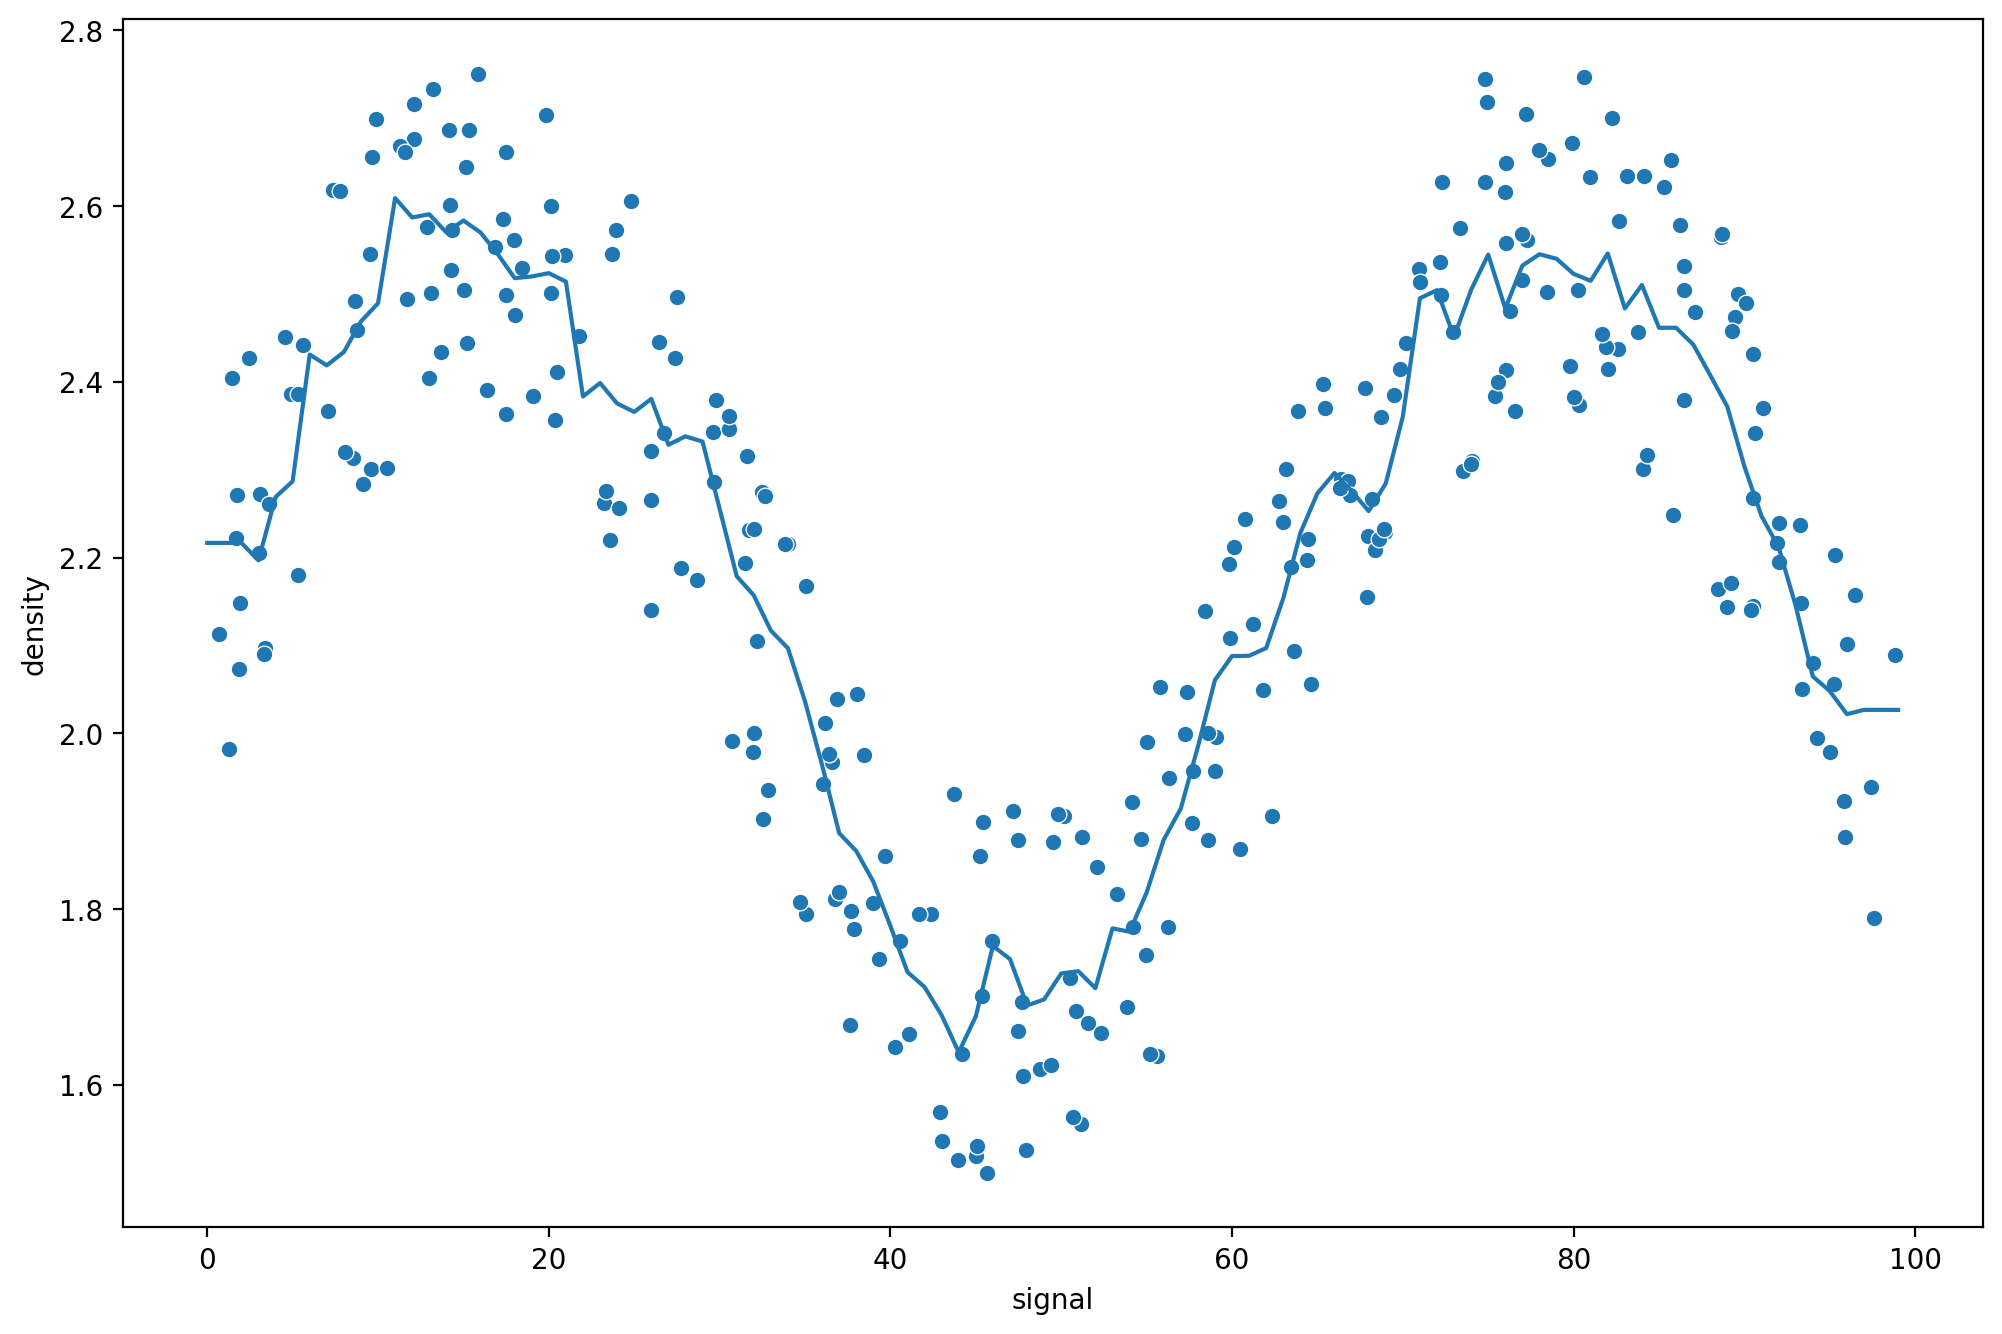

In [32]:
signal_knn_pred=knn_grid.predict(signal_range.reshape(-1,1))
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="signal", y="density",data=df)
plt.plot(signal_range , signal_knn_pred)

In [33]:
RMSE=np.sqrt(mean_squared_error(y_test, knn_grid_pred))

In [34]:
RMSe

0.14419338115267671

In [45]:
from sklearn.svm import SVR

svr=SVR()
grid_param_svr={"C":[0.001 ,0.01 ,0.1 ,0.5 , 1] }
svr_grid=GridSearchCV(svr ,grid_param_svr)
svr_grid.fit(x_train , y_train)

GridSearchCV(estimator=SVR(), param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [46]:
svr_grid.best_params_

{'C': 0.5}

In [47]:
svr_grid_pred=svr_grid.predict(x_test)

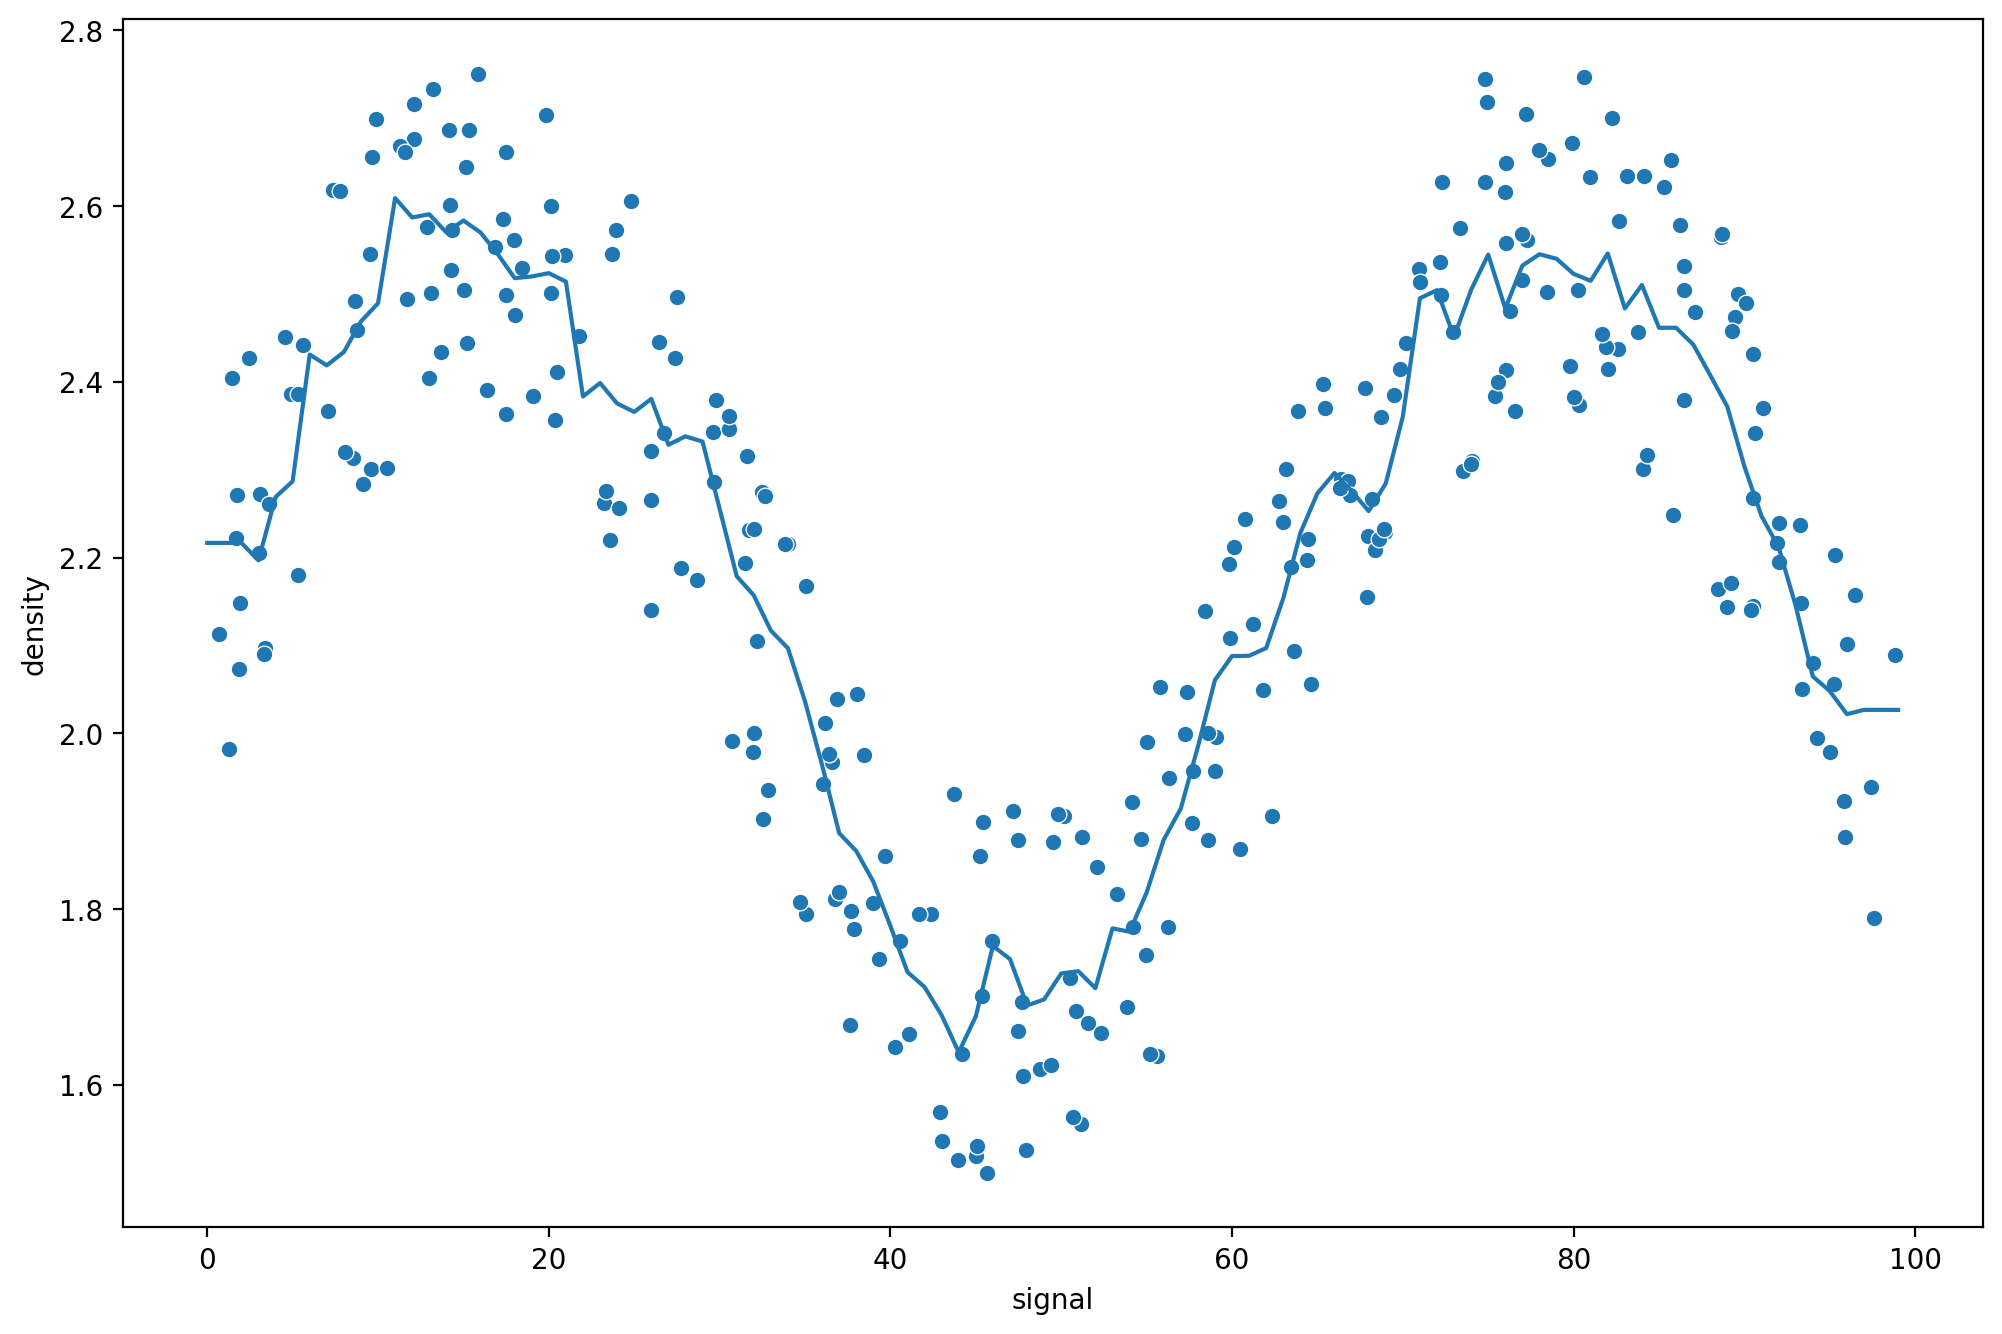

In [48]:
signal_svr_pred=knn_grid.predict(signal_range.reshape(-1,1))
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="signal", y="density",data=df)
plt.plot(signal_range , signal_svr_pred)

In [49]:
RMSE_svr=np.sqrt(mean_squared_error(y_test, svr_grid_pred))

In [50]:
RMSE_svr

0.14257347584929767

# DecisionTreeRegressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

dtc=DecisionTreeRegressor()
dtc_param={"criterion":["squared_error" ,"friedman_mse" ,"absolute_error"] ,"max_depth":[3,4,5] }
dtc_grid=GridSearchCV(dtc ,dtc_param )
dtc_grid.fit(x_train , y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 4, 5]})

In [52]:
dtc_grid.best_params_

{'criterion': 'squared_error', 'max_depth': 4}

In [53]:
dtc_grid_pred=dtc_grid.predict(x_test)

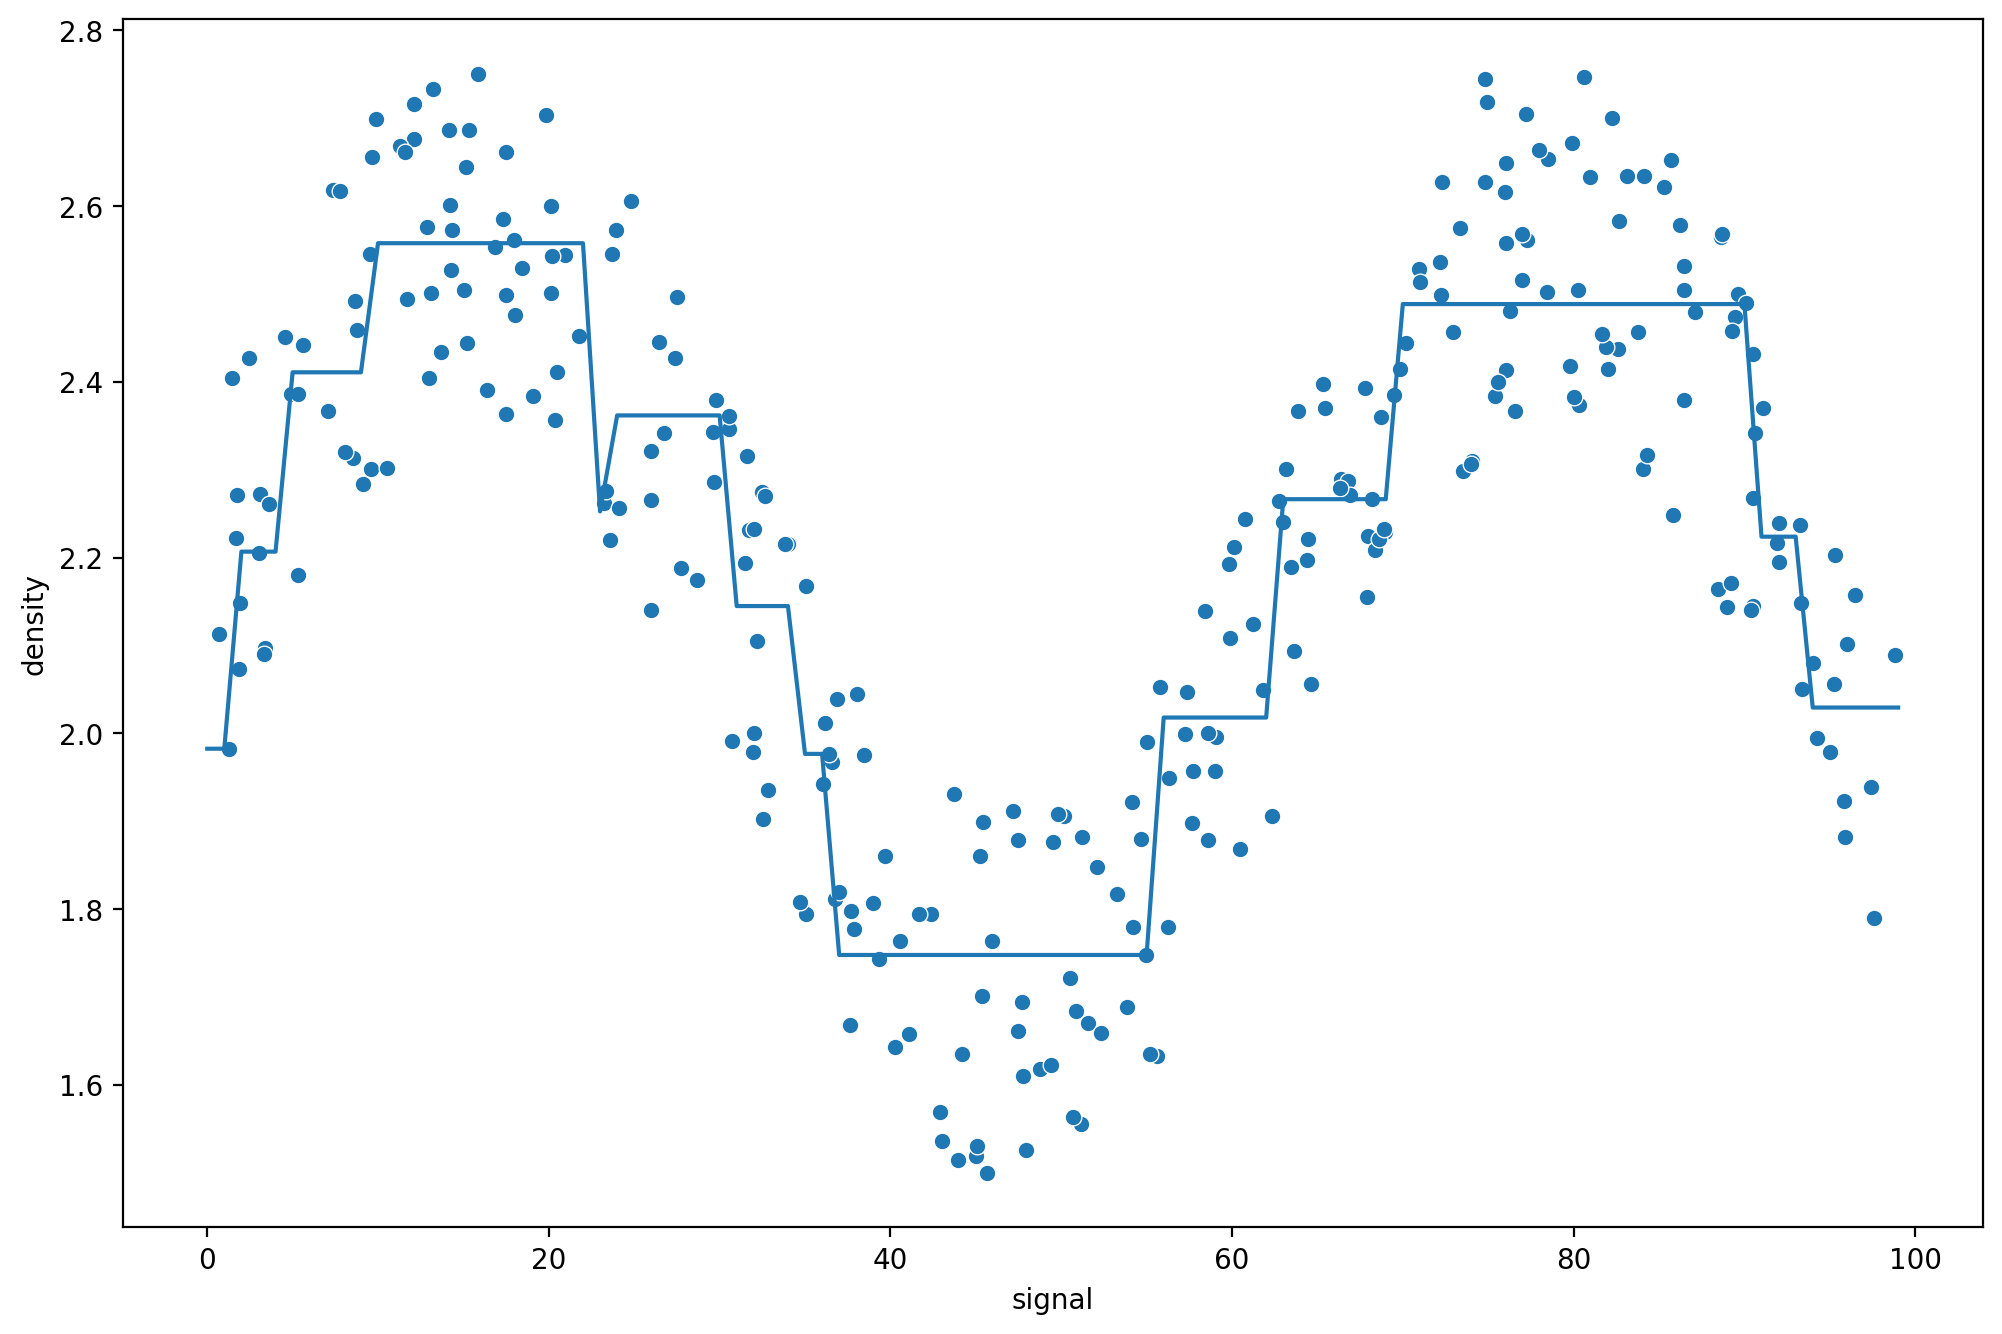

In [54]:
signal_dtc_pred=dtc_grid.predict(signal_range.reshape(-1,1))
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="signal", y="density",data=df)
plt.plot(signal_range , signal_dtc_pred)

In [55]:
RMSE_dtr=np.sqrt(mean_squared_error(y_test, dtc_grid_pred))

In [56]:
RMSE_dtr

0.14591046634808624

In [57]:
dtc=DecisionTreeRegressor(criterion= 'squared_error', max_depth= 4)
dtc.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=4)

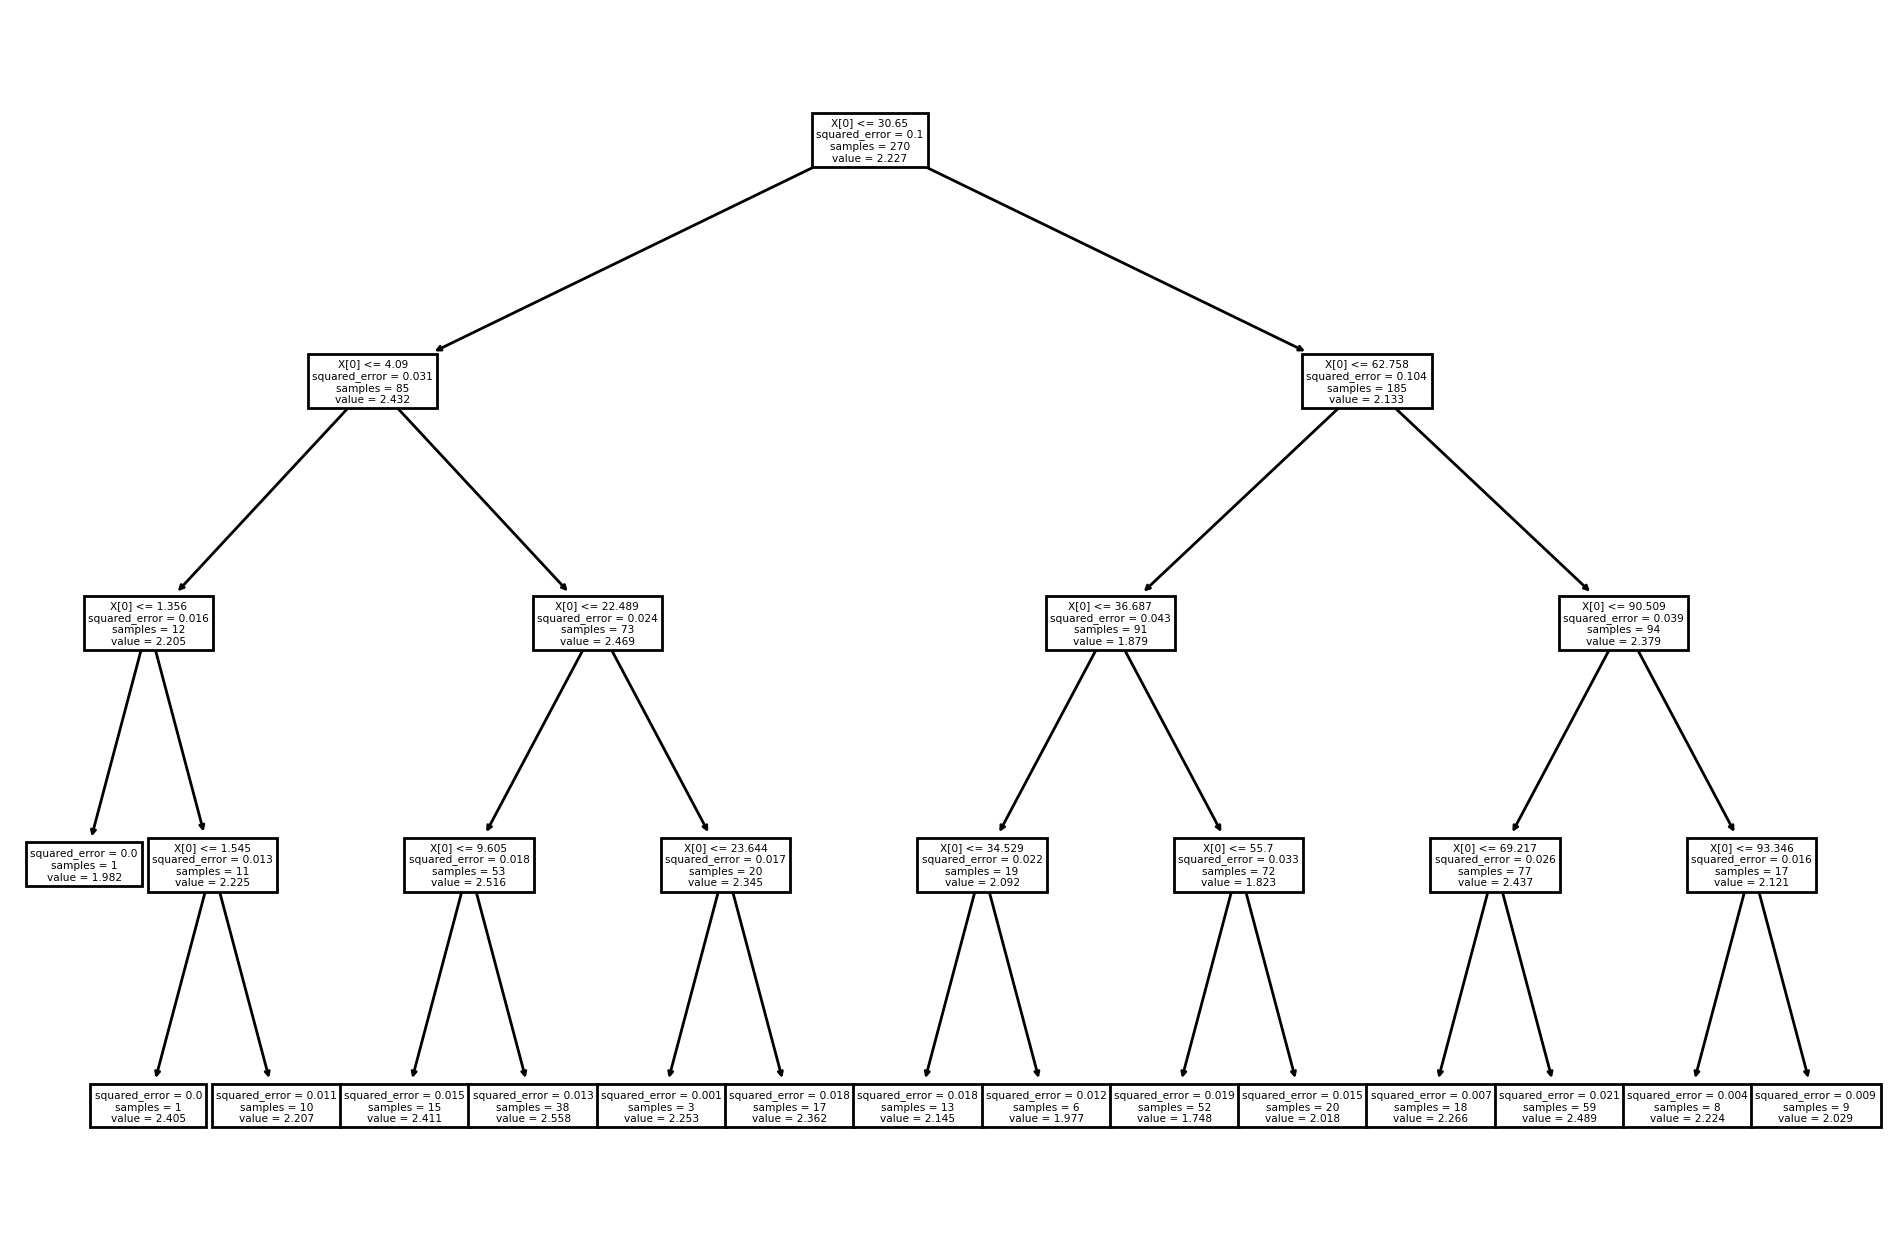

In [58]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8) , dpi=200)
plot_tree(dtc);

# RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr_grid_param={"n_estimators":[50,64 ,100],"criterion":["squared_error","absolute_error"] ,"bootstrap":[True , False] , "oob_score":[True , False]}
rfr_grid=svr_grid=GridSearchCV(rfr ,rfr_grid_param)
rfr_grid.fit(x_train , y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Anaconda\lib\site-packages\sklearn\model

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'n_estimators': [50, 64, 100],
                         'oob_score': [True, False]})

In [60]:
rfr_grid.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'n_estimators': 50,
 'oob_score': False}

In [43]:
rfr_grid_pred=rfr_grid.predict(x_test)

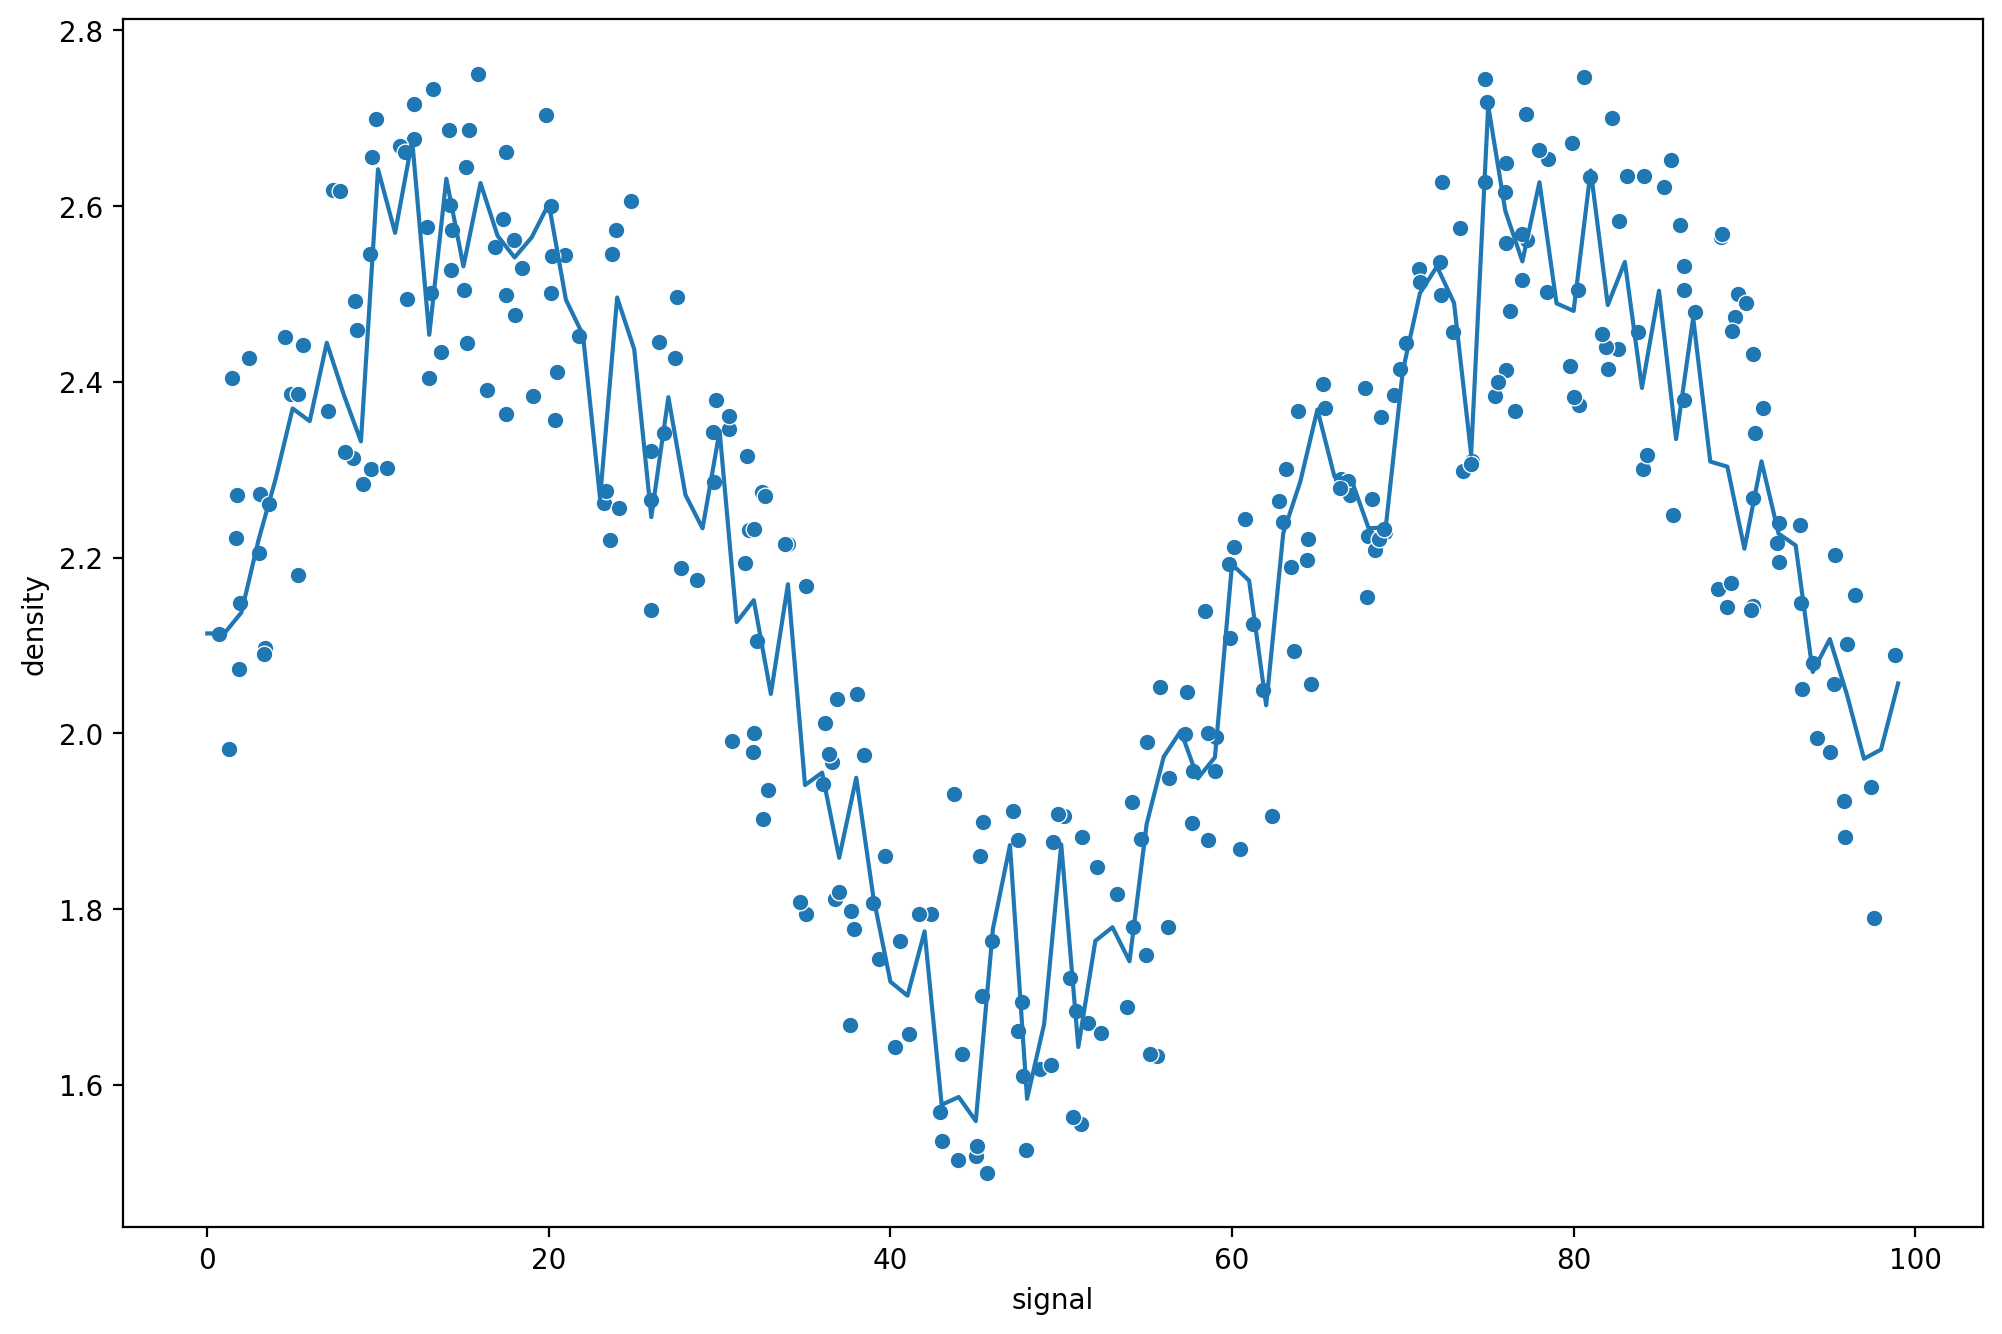

In [44]:
signal_rfr_pred=rfr_grid.predict(signal_range.reshape(-1,1))
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="signal", y="density",data=df)
plt.plot(signal_range , signal_rfr_pred)

In [61]:
RMSE_rfr=np.sqrt(mean_squared_error(y_test, rfr_grid_pred))

In [62]:
RMSE_rfr

0.14258514167416714